# 商业案例数据分析报告的撰写范例——巧克力销量的影响因素分析

本文将研究京东电商平台上影响巧克力销量的因素，以及这些因素和销量之间的数量关系。首先，对京东电商平台上的巧克力销售数据进行收集和分析，以确定各种因素（如价格、促销活动、产品特性等）对销量的影响程度。然后，通过定量分析方法，包括相关性分析和回归分析等模型，来确定这些因素与销量之间的数量关系。最终，根据分析结果提出建议，以优化巧克力销售策略。

## 1 背景介绍

【商品图片】下载开源图片，开源图片网站有：

1. unsplash: <https://unsplash.com/>
2. pexels: <https://www.pexels.com/zh-cn/>
3. pixabay: <https://pixabay.com/zh/>

<center><img src='image/jessica-loaiza-DHYfjAe_eeo-unsplash.jpg' width=400></center>
<center>图片来源:Jessica Loaiza@unsplash.com</center>



【商品介绍】  
巧克力是以可可制品(包括可可脂、可可粉或可可浆)和糖为主要原材料制成的一种甜食，口感细腻甜美，并伴随一股浓郁的香气，是休闲零食的一大品类。

【行业、市场现状、产量、产值、人均消费量等，以及数据来源】  
2010年以来，全球巧克力产品销售规模稳步增长，Statista数据显示，2019年全球巧克力产品销售规模达1186.2亿美元，同比2018年增长4.4%，预计2020年全年销售额可达1237.0亿美元，到2023年全球销售额将超过1350亿美元。按照消费量计，2019年全球巧克力产品消费量达1042.4万吨，同比2018年增长1.8%，预计2020年全年消费量可达1060.1万吨，到2023年全球消费量将超过1100万吨。

【商品的特点】  
按照产品中使用代可可脂及是否添加辅料，可将巧克力产品进一步细分。常见的纯巧克力有黑巧克力、白巧克力、牛奶巧克力等，巧克力制品则有果仁巧克力、夹心巧克力、威化巧克力、酒心巧克力等。

【商品的品牌、即市场参与者】  
目前国内巧克力的品牌主要有：德芙、费列罗、好时、Meiji、歌帝梵等，这些品牌的主要销售渠道为超市、电商平台等。

【商品所在行业的发展趋势、存在的问题】（非必需）

## 2 研究的问题

本文主要研究JD电商平台上影响巧克力销量的因素有哪些，以及这些因素和销量之间的数量关系。  
所考虑的因素如下：

|变量类型|变量名|详细说明|单位|
|---|---|---|---|
|因变量Y|巧克力的销量|JD平台的巧克力的销量，这里使用评价数量作为代理|评价数|
|自变量X1|价格|每500g巧克力的价格|元|
|自变量X2|巧克力的品牌|德芙、好时等，|虚拟变量0，1|
|自变量X3|巧克力的口味|黑巧克力、牛奶巧克力等|虚拟变量0，1|



## 3 数据读取与处理

### 3.1 数据采集

本文通过应用数据采集软件（八爪鱼），从JD平台上采集和巧克力相关的数据。

采集方法如下：

1. 搜索JD平台，使用关键词“巧克力”，获取到链接地址
2. 应用八爪鱼上智能爬取功能，采集第1步的链接地址
3. 采集样本数为400+个样本，并保存为xlsx格式
4. 转换xlsx格式文件为csv格式文件

### 3.2 数据读取

我们使用pandas库来读取相关的数据集文件：巧克力数据集.CSV

In [1]:
import pandas as pd
data = pd.read_csv('datasets/巧克力小数据集.csv')
print('数据集的有样本数:%s, 特征数:%s' %(data.shape[0], data.shape[1]))

数据集的有样本数:402, 特征数:10


### 3.3 数据去重

这一步，对数据集进行去重操作，删除重复的样本：

In [2]:
data = data.drop_duplicates()
print('去重后的样本数：', data.shape[0])

去重后的样本数： 394


### 3.4 保留有效的列

In [3]:
import warnings
warnings.filterwarnings('ignore')
data2 = data[['价格', '名称']]
data2['销量'] = data['pcommit']
data2

,价格,名称,销量
0,56.9,士力架花生夹心巧克力1000g量贩装 王嘉尔代言 礼物礼品横扫饥饿(新旧包装随机发放）,NaN
1,30.9,德芙Dove丝滑牛奶巧克力分享碗装 252g 代言人同款 休闲零食婚庆糖果礼品（新旧包装随机发放）,NaN
2,30.9,德芙Dove香浓黑巧克力分享碗装 252g 代言人同款办可可脂公室零食婚庆喜糖(新旧包装随机发放),NaN
3,139.9,费列罗(FERRERO)榛果威化糖果巧克力制品 婚庆喜糖零食伴手礼 节日礼物员工福利 48粒...,NaN
4,30.9,德芙什锦碗装三种口味混合 249g 代言人同款 休闲零食礼物礼品（新旧包装随机发放）,NaN
...,...,...,...
397,25.8,德国进口 RitterSport 瑞特滋（原瑞特斯波德）加纳系列81%特浓黑巧克力 休闲零食...,10万+条评价
398,39.9,好时（Hershey's） 巧克力排块30g*9条270g盒装 曲奇奶香好时脆乐多30g*9条,1000+条评价
399,12.5,Solove100%纯黑巧克力纯脂礼盒装极苦送女友零食纯可可脂120g 72%可可-苦中略甜...,500+条评价
400,79.9,好时之吻 Kisses 曲奇奶香好时脆乐多 休闲零食 糖果巧克力 结婚糖果 婚庆喜糖 散装 ...,50万+条评价


### 3.5 标题提取信息

下面准备从名称这一列提取信息，提取方法如下：

In [4]:
# 将以下代码封装成函数
def func(data2, key_word):
    result = []
    for i in data2['名称']:
        if key_word.lower() in i.lower():   #字母统一成小写
            result.append(1)
        else:
            result.append(0)
    return result

In [5]:
data3 = pd.DataFrame()
# 品牌--------------------------------
data3['德芙'] = func(data2, '德芙')
data3['好时'] = func(data2, '好时')
data3['费列罗'] = func(data2, '费列罗')
data3['Meiji'] = func(data2, 'Meiji')
data3['歌帝梵'] = func(data2, '歌帝梵')
data3['瑞士莲'] = func(data2, '瑞士莲')


# 口味---------------------------------
data3['牛奶巧克力'] = func(data2, '牛奶巧克力')
data3['夹心巧克力'] = func(data2, '夹心巧克力')
data3['黑巧克力'] = func(data2, '黑巧克力')
data3['榛果'] = func(data2, '榛果')

data3['进口'] = func(data2, '进口')

In [6]:
data3

,德芙,好时,费列罗,Meiji,歌帝梵,瑞士莲,牛奶巧克力,夹心巧克力,黑巧克力,榛果,进口
0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
389,0,0,0,0,0,0,0,0,1,0,1
390,0,1,0,0,0,0,0,0,0,0,0
391,0,0,0,0,0,0,0,0,1,0,0
392,0,1,0,0,0,0,0,0,0,0,0


如果想要知道有哪些样本里的信息没有被提取出来，可以使用如下方法。然后会发现品牌：“诺梵”这个品牌没有被提取出来，可以加到上面。

In [7]:
#data2[data3.sum(axis=1)==0]

那些没有提取出信息的样本，将其赋予空值np.nan

In [8]:
import numpy as np
data3[data3.sum(axis=1)==0] = np.nan

In [9]:
data3['价格'] = data2['价格']
data3['销量'] = data2['销量']

### 3.6 评价数处理

In [10]:
import numpy as np
result = []
for i in data3['销量']:
    if type(i)==str:
        i = i.replace('评价', '').replace('+', '').replace('条','').replace('万','0000')
        i = float(i)
    result.append(i)

In [11]:
data3['销量'] = result
data3

,德芙,好时,费列罗,Meiji,歌帝梵,瑞士莲,牛奶巧克力,夹心巧克力,黑巧克力,榛果,进口,价格,销量
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,56.9,NaN
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,30.9,NaN
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30.9,NaN
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,139.9,NaN
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,129.0,200000.0
390,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.0,500.0
391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,78.0,500.0
392,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.9,500.0


如果某些样本的评价数过高或过低，将其过滤并赋值为NaN或最大值，例如销量在0份，可以将其赋值为Nan。

In [12]:
data3['销量'][data3['销量']==0] = np.nan

In [13]:
data3['销量'][data3['销量']>500000] = 500000

### 3.7 价格处理

如果价格这一列存在“暂无报价”，将其过滤并赋值为NaN，操作如下：

In [14]:
data3['价格'][data3['价格']=='暂无报价'] = np.nan

再清除字符后，我们可以将“价格”这一列，类型转换成浮点型，操作如下：

In [15]:
data3['价格'] = data3['价格'].astype(np.float64)

如果某个样本价格高的离谱，将其过滤并赋值为NaN或最大值，例如超过200块，可以讲将其赋值为Nan或200

In [16]:
data3['价格'][data3['价格']>200] = np.nan

### 3.8 删除缺失值

观察发现，data3的评价数这一列有很多NaN这种缺失值，我们将其删除掉，也就是如果一行有缺失值，就将这一行全部删除。

In [17]:
data3=data3.dropna()
data3

,德芙,好时,费列罗,Meiji,歌帝梵,瑞士莲,牛奶巧克力,夹心巧克力,黑巧克力,榛果,进口,价格,销量
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,56.9,500000.0
31,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,30.9,500000.0
32,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30.9,500000.0
33,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,139.9,500000.0
34,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.9,500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,129.0,200000.0
390,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.0,500.0
391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,78.0,500.0
392,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.9,500.0


如果需要保存清洗好的数据到文件中“ChocolateCleanedData.csv”，就使用如下的方法:

In [18]:
data3.to_csv('datasets/ChocolateCleanedData.csv', index=False)

## 4 描述性统计

描述性统计方法是一种统计学方法，用于对数据进行总结、描述和分析。它通过计算、整理和展示数据的基本特征，帮助我们理解数据的分布、趋势和变异性。下面我们使用描述性统计的方法生成结果:

In [19]:
cleaned_data = data3
cleaned_data.describe()

,德芙,好时,费列罗,Meiji,歌帝梵,瑞士莲,牛奶巧克力,夹心巧克力,黑巧克力,榛果,进口,价格,销量
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,0.209184,0.045918,0.142857,0.025510,0.035714,0.107143,0.188776,0.112245,0.316327,0.112245,0.331633,64.306327,156216.198980
std,0.407767,0.209844,0.350823,0.158073,0.186052,0.310087,0.392332,0.316476,0.466233,0.316476,0.472005,44.945873,190232.371186
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.900000,75.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.725000,10000.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.900000,50000.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,89.000000,200000.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,198.000000,500000.000000


我们观察到，价格的最小值和最大值分别是xxx元和xxx元，价格区间跨度较大。巧克力价格的平均值为xxx元，标准差为xxx元，价格的的差异较大。

评论数的最小值和最大值分别为xxx和xxx万份，平均值在xxx万份，标准差为xxx万份。

### 4.1 销量的分布（单一变量）

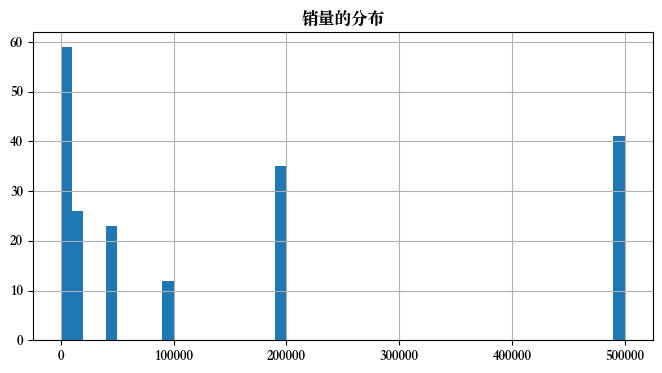

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Songti SC'  #宋体

Z = cleaned_data['销量']
fig, ax = plt.subplots(figsize=(8,4))      
ax.hist(Z, bins=50)               
ax.set_title('销量的分布')
ax.grid()
plt.show()

### 4.2 价格的分布（单一变量）

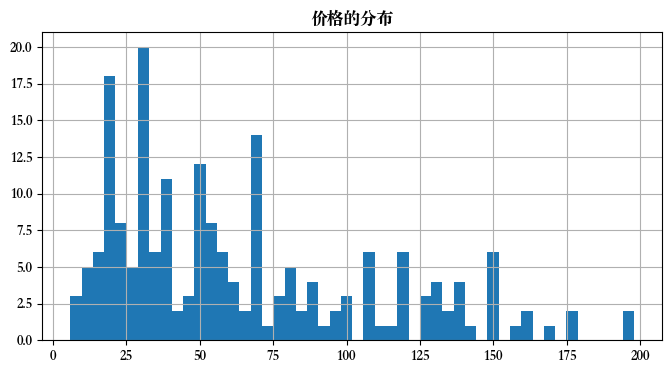

In [21]:
Z = cleaned_data['价格']
fig, ax = plt.subplots(figsize=(8,4))      
ax.hist(Z, bins=50)               
ax.set_title('价格的分布')
ax.grid()
plt.show()

通过观察上述价格分布，样布的价格大部分落在了0到150元这个区间里，有极少部分的样布大于150元。

接下来，我们使用箱型图（Box plot）快速了解价格的中心、离散程度和异常值情况。它通过五个统计量（最小值、第一四分位数、中位数、第三四分位数、最大值）来描述数据的分布情况，并使用箱体和须线的形式呈现出来。

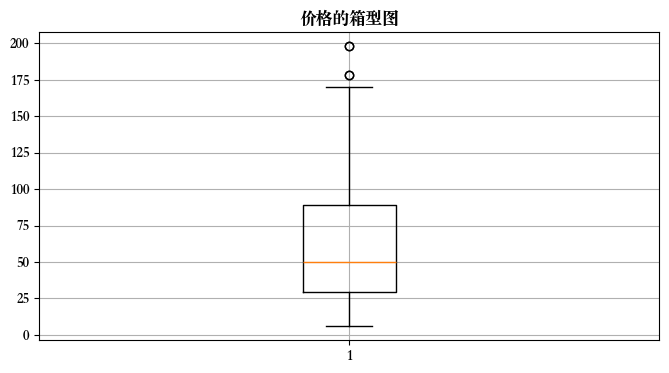

In [22]:
Z = cleaned_data['价格']
fig, ax = plt.subplots(figsize=(8,4))
ax.boxplot(Z)
ax.set_title('价格的箱型图')
ax.grid()
plt.show()

通过绘制箱型图，我们可以清晰地看到75%的数据在100元以下，绝大多数的数据在200元以内，极少的样本价格在200元以上。

### 4.3 品牌的占比（单一变量）

以下通过绘制饼状图，来观察德芙、好时和费列罗等品牌的市场占有率。

In [23]:
labels = [ '德芙', '好时', '费列罗', 'Meiji', '歌帝梵']
X = cleaned_data[labels].sum()
autopct='%1.1f%%'
explode = (0.1, 0, 0, 0, 0)

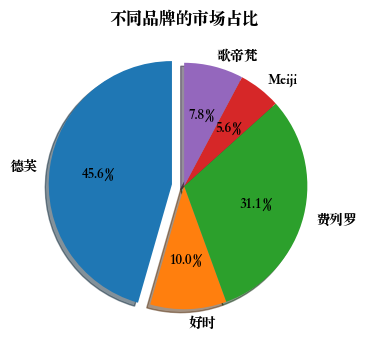

In [24]:
fig, ax = plt.subplots(figsize=(8,4))
ax.pie(X, labels=labels,
          autopct=autopct,
          explode=explode,
          shadow=True,
          startangle=90)             
ax.set_title('不同品牌的市场占比')
plt.show()

通过观察，我们可以知道德芙市场占有率最高，占比超过X%，其次是费列罗，市场占有率为X%，
最少的为Meiji巧克力，市场占有率为X%。这种差异的原因可能有以下几个方面：

1. 德芙可能在市场营销方面表现出色，采取了一系列有效的策略。
2. 德芙的巧克力产品可能符合消费者的偏好，包括价格、口味、品牌等方面。
3. 巧克力市场符合经济学原理中的非完全竞争市场，在这种市场中，出现了寡头和垄断现象，部分品牌具有较高的市场份额和市场支配地位。

然而，以上的猜测仍需进一步的分析和证实，以确保结论的准确性和可靠性。

In [25]:
labels = ['牛奶巧克力', '夹心巧克力', '黑巧克力', '榛果']
X = cleaned_data[labels].sum()
autopct='%1.1f%%'
explode = (0, 0, 0.1, 0)

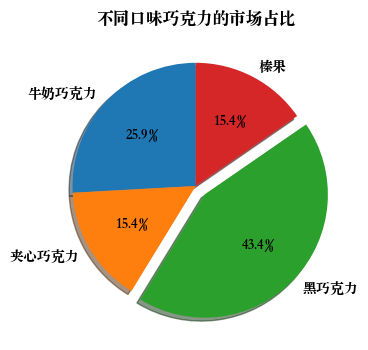

In [26]:
fig, ax = plt.subplots(figsize=(8,4))
ax.pie(X, labels=labels,
          autopct=autopct,
          explode=explode,
          shadow=True,
          startangle=90)             
ax.set_title('不同口味巧克力的市场占比')
plt.show()

经过观察，我们可以得出以下结论：黑巧克力口味在市场中占据最高的份额，超过XX%；其次是牛奶巧克力，市场份额为XX%；榛果口味的巧克力紧随其后，市场份额为XX%；而杏仁巧克力的市场份额最低，仅为X%。

我们推测这种差异可能有以下原因：

1. 消费者的口味偏好是多样化的，三种口味的受欢迎程度相对接近，各自拥有一定数量的喜好人群。
2. 在电商平台上，市场具有高度的自由选择权，不存在渠道或商家强制销售或支配消费者的情况，消费者具有很强的自主权。

然而，以上的推测仍需进一步的分析和证实，以确保结论的准确性和可靠性。

### 4.4 价格和销售量的关系（两个变量）

我们希望通过绘制散点图来观察价格和销量之间的关系。

In [27]:
X = cleaned_data['价格']
Y= cleaned_data['销量']

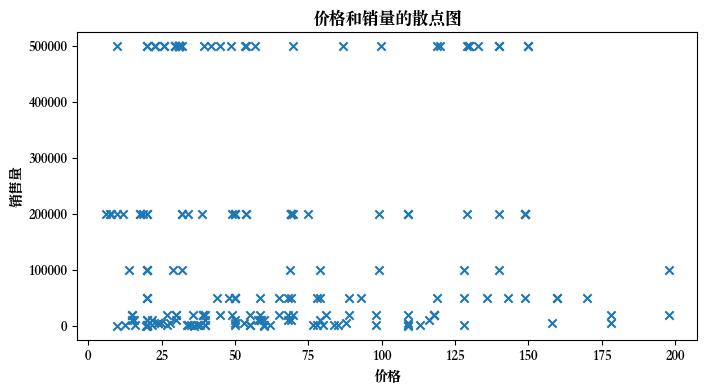

In [28]:
fig, ax = plt.subplots(figsize=(8,4))  
ax.scatter(X, Y, marker='x')               # 散点图的语句
ax.set_xlabel('价格')
ax.set_ylabel('销售量')
ax.set_title('价格和销量的散点图')
plt.show()

根据图表观察显示，销售量最高的巧克力价格区间集中在40元至50元之间，而销售量较高的巧克力则呈现较大的价格分布范围，大致在0元至150元左右。然而，定价在200元以上的巧克力销售量普遍较低，不超过10万份。结合电商平台不披露商品销量、但是披露消费者对于商品的评价数这个原因，我们容易理解为什么散点图里，散点呈阶梯式分布。

从消费者的角度来看，价格分布在100元左右及以下的巧克力呈现出一个明显的趋势：价格越低，销量越好。销售量最高可达到500万份。然而，当价格继续下降时，销量反而出现下降，这可能是由以下原因引起的：

1. 价格较低的品牌或口味不受消费者欢迎。
2. 消费者对质量问题表示担忧。
3. 消费者群体对于价格区间的认同程度，例如30元至40元之间，并存在跟随和羊群效应。

然而，以上的推测仍需进一步的研究和证实。


我们还能够观察到，在50元左右样本数较多，但是销量普遍不高，产生的原因可能有：商家在这一价格区间上竞争很激烈，但是总的市场份额又有限，造成每一个商家销量反而不高。当价格超过50元时，消费量呈现持续下降的趋势，直至接近400元时销量几乎为零。这种下降趋势可能有以下原因：

1. 符合经济学规律，即价格越高，销量越低。较高的价格会抑制消费者的购买意愿。
2. 较高价格的巧克力产品本身可能不受消费者喜爱，可能涉及到口味、包装等因素，因此受众较少。

然而，以上的推测仍需进一步的研究和证实。

## 5 数据集的划分 

### 5.1 模型输入X和y

回归模型中使用$X$和$y$的数据结构如下，$X$包含多个样本，以及每个样本的属性，也就是自变量，和X的每个样本对应的就是我们的预测目标$y$，也就是因变量。

在实际编程中，一般使用pd.DataFrame来表示$X$和$

![X&y](image/X&y.png)

In [30]:
x = cleaned_data[['价格', '德芙', '好时', '费列罗', 'Meiji', '歌帝梵', '牛奶巧克力', '夹心巧克力',
       '黑巧克力', '榛果', '进口']]
y = cleaned_data['销量']

这里需要注意，如果x中包含y的信息，会对模型预测结果产生哪些影响。

### 5.2 训练集（IS）和测试集（OOS）的划分

随机对照试验是商业数据分析领域中常用的一种实验设计方法。在随机对照试验中，研究者将参与试验的个体随机分为两组：实验组和对照组。实验组接受某种干预或处理，而对照组则不接受干预，作为对照参照。

根据上述的理论，我们通常将数据集划分为训练集（training sets）和测试集（test sets），前者负责模型的训练任务，后者用来评价模型的表现。两者的划分比例按照经验，设置为0.8:0.2。

一般将80%的原始数据集的子样本集作为样本内(In-sample, IS)，剩余20%作为样本外(Out-of-sample, OOS)。样本总数为500个，一种简单的切割方法是直接指定前80%个样本为IS，后面20%为OOS，但是这种采样方法存在弊端。

![fix_split](image/fix_split.png)

当我们并不了解原始数据集是不是被刻意排列了，最好的办法是使用随机抽样，即随机抽80%为IS，剩余的20%为OOS。我们使用生成随机数的方法，生成随机序列，来从总体样本中随机抽取样本：

![random_split](image/random_split.png)

In [31]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = \
        train_test_split(x, y,train_size=0.8,random_state=4)

## 6 多元回归分析模型

### 6.1 各个变量之间的相关系数

相关系数是用来衡量两个变量之间关联程度的统计量。它可以告诉我们两个变量是如何一起变化的。常见的相关系数有皮尔逊（Pearson）相关系数和斯皮尔曼相关系数。皮尔逊相关系数适用于连续变量，它的取值范围在-1到1之间，值越接近1或-1表示两个变量之间的线性关系越强；值越接近0表示两个变量之间的线性关系越弱。

首先，我们计算单个自变量和因变量之间的相关系数，使用皮尔逊相关系数来计算。

In [32]:
import scipy.stats as stats
r = stats.pearsonr(train_x['价格'], train_y)
print('pearson r:', r[0])

pearson r: -0.0493724173969635


接着，我们使用相关系数矩阵来刻画多个变量之间的关系。

In [33]:
train_df = train_x.copy()
train_df['评价数'] = train_y

In [34]:
train_df

,价格,德芙,好时,费列罗,Meiji,歌帝梵,牛奶巧克力,夹心巧克力,黑巧克力,榛果,进口,评价数
218,128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,50000.0
372,19.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,100000.0
285,79.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0
274,59.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10000.0
85,31.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
273,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20000.0
303,53.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,5000.0
380,128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,100000.0
368,14.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20000.0


<Axes: >

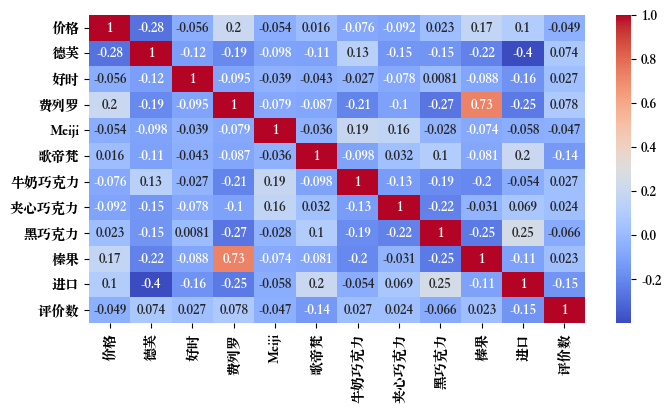

In [35]:
import seaborn as sns
plt.figure(figsize=(8,4))
plt.rcParams['axes.unicode_minus'] = False  # 解决负号“-”显示异常
sns.heatmap(train_df.corr(),
           annot=True,
           cmap='coolwarm')

观察以上相关性的热力图，我们可以得出一些初步的结论：

1. 费列罗和榛果的相关性很高，数值为XXX
2. Meiji品牌和杏仁相关性很高，说明该品牌热衷于出品该口味的巧克力
3. 歌帝梵和价格相关性很高，说明相较其他品牌，其价格普遍偏高
4. 德芙和进口相关性为负，说明该品牌很有可能已经国产。

### 6.2 样本内训练模型

在样本内训练模型过程中，我们只能使用train_x和train_y。

首先，初始化线性回归模型。

In [36]:
from sklearn import linear_model
model = linear_model.LinearRegression()

其次，训练模型

In [37]:
model.fit(train_x, train_y)

LinearRegression()

然后，生成预测结果

In [38]:
IS_predicted_y = model.predict(train_x)

接着，计算模型预测精度

In [39]:
IS_precision = model.score(train_x, train_y) 

最后，生成汇总信息(summary)

In [40]:
print('截距', model.intercept_)
print("样本内(IS)训练集精度:%.2f" %IS_precision)

截距 170998.90338284452
样本内(IS)训练集精度:0.05


In [41]:
coef = ['%i*%s' %(model.coef_[i], train_x.columns[i])\
                     for i in range(len(model.coef_))]
print('变量前的系数：', coef)

变量前的系数： ['-157*价格', '8213*德芙', '12706*好时', '55414*费列罗', '-75234*Meiji', '-107292*歌帝梵', '19426*牛奶巧克力', '36929*夹心巧克力', '3878*黑巧克力', '-30952*榛果', '-42252*进口']


In [42]:
'%i' %model.intercept_ + '+' + '+'.join(coef)

'170998+-157*价格+8213*德芙+12706*好时+55414*费列罗+-75234*Meiji+-107292*歌帝梵+19426*牛奶巧克力+36929*夹心巧克力+3878*黑巧克力+-30952*榛果+-42252*进口'

模型的回归方程：

$$
销量 = xxx-XX*价格+XXX*德芙+XXX*好时+XXX*费列罗+\dots
$$

根据方程可以得出以下结论，在保持其他自变量不变的情况下：

1. 价格每增加1元，销量增加/减少xx个单位
2. 如果品牌是德芙，销量将带来xx个单位的增加
3. 如果巧克力是黑巧克力，销量将带来xxx个单位的增加
4. xxxxx

我们将样本内IS的y和预测出的y绘制到一张图片上

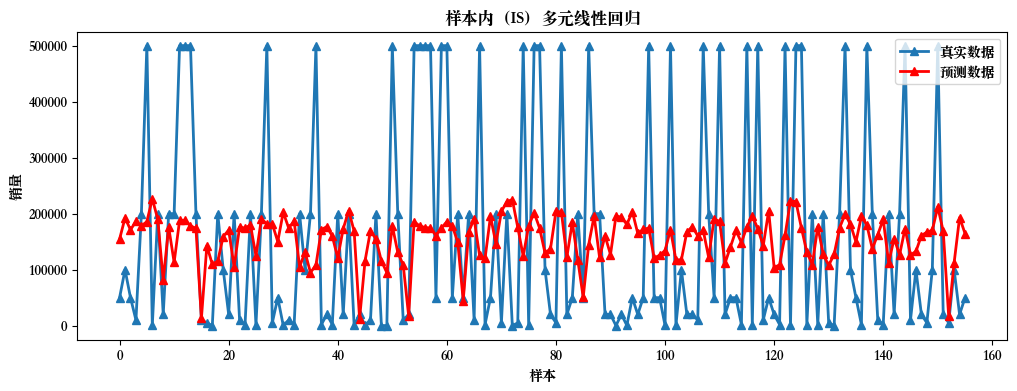

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(range(len(train_y)), train_y, label='真实数据', linewidth=2, marker='^')
ax.plot(range(len(train_y)), IS_predicted_y, label='预测数据', linewidth=2, color="red",marker='^')
ax.set_xlabel('样本')
ax.set_ylabel('销量')
ax.set_title('样本内（IS）多元线性回归')
ax.legend()
plt.show()

### 6.3 样本外表现

我们再来看看我们刚才训练的模型，在样本外的表现。

In [44]:
OOS_predicted_y = model.predict(test_x)

再次，计算模型预测精度

In [45]:
OOS_precision = model.score(test_x, test_y)

最后，生成汇总信息（summary）

In [46]:
print("样本外（OOS）测试集预测精度:%.2f" %OOS_precision)

样本外（OOS）测试集预测精度:0.04


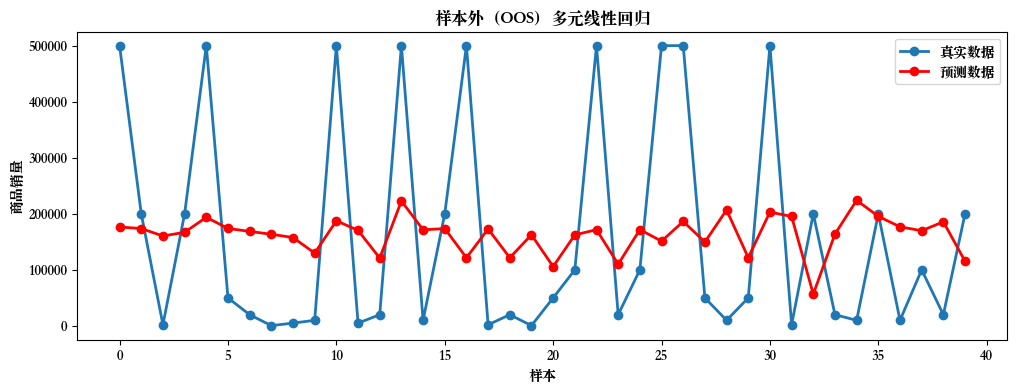

In [47]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(range(len(test_y)), test_y, 'o-', label='真实数据', linewidth=2)
ax.plot(range(len(test_y)), OOS_predicted_y, 'o-', label='预测数据', linewidth=2, color="red")
ax.set_xlabel('样本')
ax.set_ylabel('商品销量')
ax.set_title('样本外（OOS）多元线性回归')
ax.legend()
plt.show()

In [48]:
print("样本内(IS)训练集精度:%.2f" %IS_precision)
print("样本外（OOS）测试集预测精度:%.2f" %OOS_precision)

样本内(IS)训练集精度:0.05
样本外（OOS）测试集预测精度:0.04


根据上述的回归分析结果，样本内和样本外的预测精度较低，可以采取进一步措施，改善预测精度。

## 7. 决策树模型

决策树模型，作为一类用来进行分类任务的学习模型，它处理的标签需要离散型的变量，对于本文中商品的销量，我们需要将其转换为几个类别。

### 7.1 划分销量等级

In [49]:
quantile_1 = cleaned_data['销量'].quantile(0.20)
quantile_2 = cleaned_data['销量'].quantile(0.40)
quantile_3 = cleaned_data['销量'].quantile(0.60)
quantile_4 = cleaned_data['销量'].quantile(0.80)

初始化销量为'1级'

In [50]:
cleaned_data['销量等级'] = '1级销量'
cleaned_data.loc[cleaned_data['销量']<quantile_1,'销量等级'] = '1级销量'
cleaned_data.loc[cleaned_data['销量']>=quantile_1,'销量等级'] = '2级销量'
cleaned_data.loc[cleaned_data['销量']>=quantile_2,'销量等级'] = '3级销量'
cleaned_data.loc[cleaned_data['销量']>=quantile_3,'销量等级'] = '4级销量'
cleaned_data.loc[cleaned_data['销量']>=quantile_4,'销量等级'] = '5级销量'

In [51]:
sales_num = [(cleaned_data['销量等级'] == '1级销量').sum(),
            (cleaned_data['销量等级'] == '2级销量').sum(),
            (cleaned_data['销量等级'] == '3级销量').sum(),
            (cleaned_data['销量等级'] == '4级销量').sum(),
            (cleaned_data['销量等级'] == '5级销量').sum()]

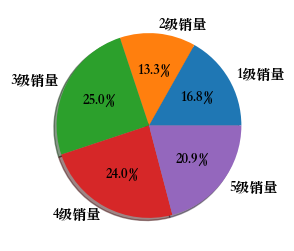

In [52]:
fig, ax = plt.subplots(figsize=(8,3))
ax.pie(sales_num,
        labels=['1级销量','2级销量','3级销量','4级销量','5级销量'],
        autopct='%1.1f%%',
        shadow=True)    
plt.show()


### 7.2 构建决策树模型并训练

重新选取自变量x和因变量y

In [53]:
x = cleaned_data[['价格', '德芙', '好时', '费列罗', 'Meiji', '歌帝梵', '牛奶巧克力', '夹心巧克力',
       '黑巧克力', '榛果']]
y = cleaned_data['销量等级']

进行随机样本划分

In [54]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = \
        train_test_split(x, y,train_size=0.8,random_state=42)

构建决策树模型并训练

In [55]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(criterion="gini",
                                       max_depth=3)   # 增大树的深度，必然会提高决策树的分类精度
tree_clf.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=3)

计算决策树的分类精度

In [56]:
tree_clf.score(train_x, train_y)

0.42948717948717946

绘制决策树

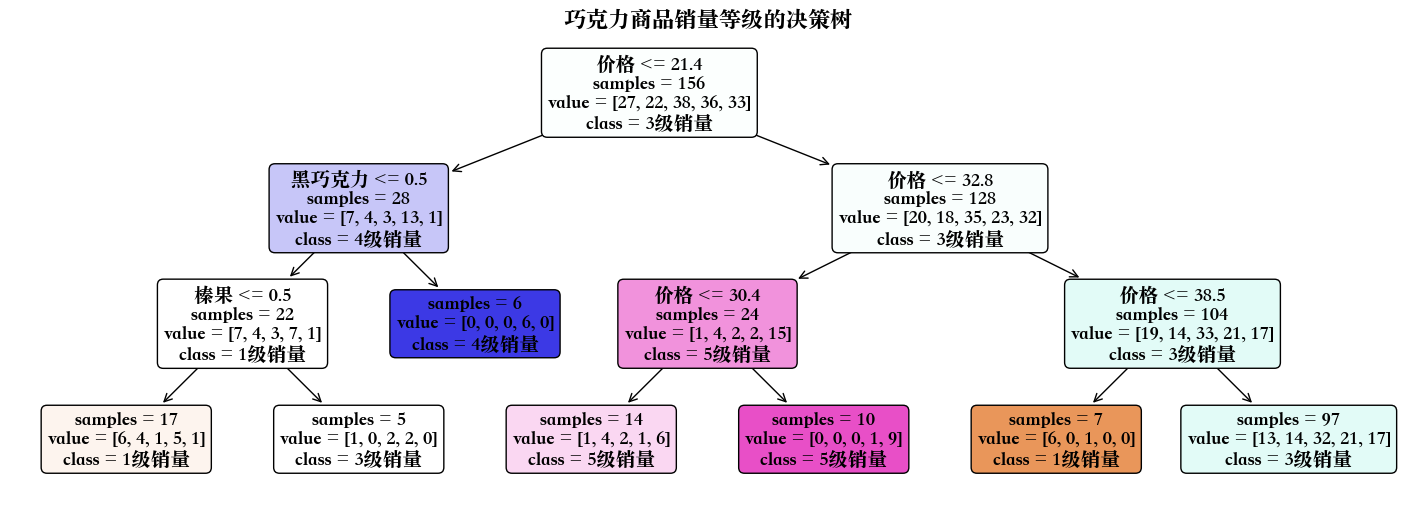

In [57]:
from sklearn.tree import plot_tree
plt.figure(figsize = (18,6)) #合适的尺寸
plot_tree(tree_clf,
          max_depth=3,     #树的深度
          feature_names=train_x.columns.tolist(),
          class_names=['1级销量','2级销量','3级销量','4级销量','5级销量'],
          filled=True,
          rounded=True,
          proportion=False,
          fontsize=14,
          impurity=False)
plt.title("巧克力商品销量等级的决策树", fontsize=16)
plt.show()

观察决策树，总样本数为176。观察最下层，会发现销售量为5级，其路径为：

- 价格>=21.4
- 价格<=32.8
- 价格<=30.5

也就是价格在21和30元区间里的，容易出现5级销量。

观察销售量为1级，其路径为：

- 价格<21.4
- 不是黑巧克力
- 不是榛果口味

或者：
- 价格>21.4
- 价格>32.8
- 价格<=38.5

销量较差。

## 8 结论与建议

### 8.1 结论

本报告基于京东平台的真实数据，采集了XXX个样本，分析和研究了影响巧克力销量的多种因素，并使用多元回归模型进行了回归分析。

### 8.2 不足

以上应用了多元回归分析模型和决策树模型，模型预测精度有限。如果需要进一步提高预测精度，我们可以通过一下方式改进：

1. 增大样本数量
2. 增加更多能预测巧克力销量的信息，例如商家的营销能力、消费者的偏好等等。
3. 更换其他模型

### 8.3 建议

对商家的建议：

1. 多销售一些XX品牌巧克力，带来更多的销量，从而带来额外的利润
2. 多销售XX口味的巧克力，带来更多的销量，从而带来额外的利润
3. 找到价格和销量的平衡点，指定合理的价格，例如降低价格，提高销量，使得利润最大化。

## 附录：绘制词云图

拼接名称为一个长字符串：

In [58]:
text = ''
for i in data['名称']:
    text += i

选择颜色：

In [59]:
from wordcloud import get_single_color_func
color_func = get_single_color_func('maroon')

选择图片：

<center><img src="image/chocolate.jpeg" alt="image/chocolate.jpeg" width="300"></center>

In [60]:
from PIL import Image
image_path = 'image/chocolate.jpeg'
image = Image.open(image_path)
image_size = image.size
mask_img = np.array(image)
print('图片大小：', image_size)

图片大小： (800, 582)


In [61]:
from wordcloud import WordCloud
wc = WordCloud(
              font_path='/System/Library/Fonts/Supplemental/Songti.ttc', 
              mask=mask_img,
              max_words=500,
              max_font_size=40,
              min_font_size=5,
              width=1200,
              height=1200,
              background_color="white", 
              color_func=color_func,
              repeat=True)
wc.generate(text)

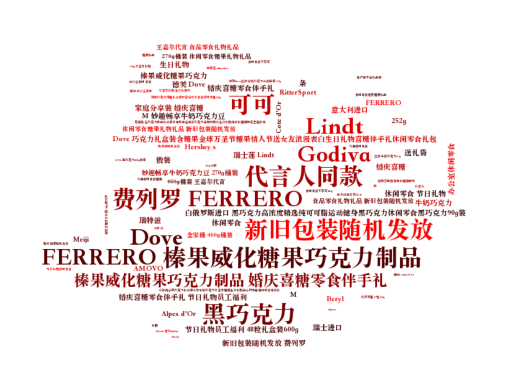

In [62]:
import matplotlib.pyplot as plt
plt.imshow(wc)
plt.axis("off")
#plt.savefig("image/ciyun_cn.jpg", dpi=500) # 或者保存成.png .svg .pdf .eps等
plt.show()